### Holiday Project

### Part A: Harmonic Force on a Rocket

#### Part A, Q1 - Q4
All systems are initialized with velocity of 0m/s, else stated. Engine Harmonic force 

$$
F(t) = F_0 \cos(\omega t)
$$

where:
- $F_0 = Initial Force$
- $\omega = Angular Frequency$

In [1]:
import math

mass = 2
spring_constant = 20 
damping_constant = 5
initial_position = 10
angular_frequencies = [3, 3.162, 4.5]



In [2]:
# Force equations

# spring force
def spring_force(spring_constant, initial_position):
    return spring_constant * initial_position

# damping force
def damping_force(damper_constant, initial_position, angular_frequencies):
    d_forces = []
    for item in angular_frequencies	:
        force = damper_constant * initial_position * item
        d_forces.append(force)
    return d_forces

# due to mass
def mass_force(mass, initial_position, angular_frequencies):
    m_forces = []
    for item in angular_frequencies:
        force = mass * initial_position * (item**2)
        m_forces.append(force)
    return m_forces

# Resultant force
def resultant_force(spring_constant, damping_constant, mass, initial_position, angular_frequencies):
    resultant_forces = []
    for omega in angular_frequencies:
        term1 = (spring_constant - (mass * (omega**2)))**2
        term2 = (damping_constant * omega)**2
        force = math.sqrt(initial_position**2 * (term1 + term2))

        resultant_forces.append(force)

    return resultant_forces

# phi  
def phi(mass, initial_position, angular_frequencies):
    phi_values = []
    for item in angular_frequencies:
        numerator = damping_constant * item
        denominator = spring_constant - (item**2) * mass
        phi = math.degrees(math.atan(numerator/denominator))
        phi_values.append(phi)
    return phi_values


In [3]:
print("The spring force is : ",spring_force(spring_constant, initial_position),"N")
print("The damping force for angular frequencies 3, 3.162, 4.5 are : ",resultant_force(spring_constant, damping_constant, mass, initial_position, angular_frequencies),"N")
print("The phi values for angular frequencies 3, 3.162, 4.5 are : ",phi(mass, initial_position, angular_frequencies),"degrees")

The spring force is :  200 N
The damping force for angular frequencies 3, 3.162, 4.5 are :  [151.32745950421557, 158.10000390074126, 304.38462510448846] N
The phi values for angular frequencies 3, 3.162, 4.5 are :  [82.40535663140857, 89.98727243679063, -47.66300076606714] degrees


In [4]:
print("The resultant force for angular frequencies 3, 3.162, 4.5 are : ",resultant_force(spring_constant, damping_constant, mass, initial_position, angular_frequencies),"N")

The resultant force for angular frequencies 3, 3.162, 4.5 are :  [151.32745950421557, 158.10000390074126, 304.38462510448846] N


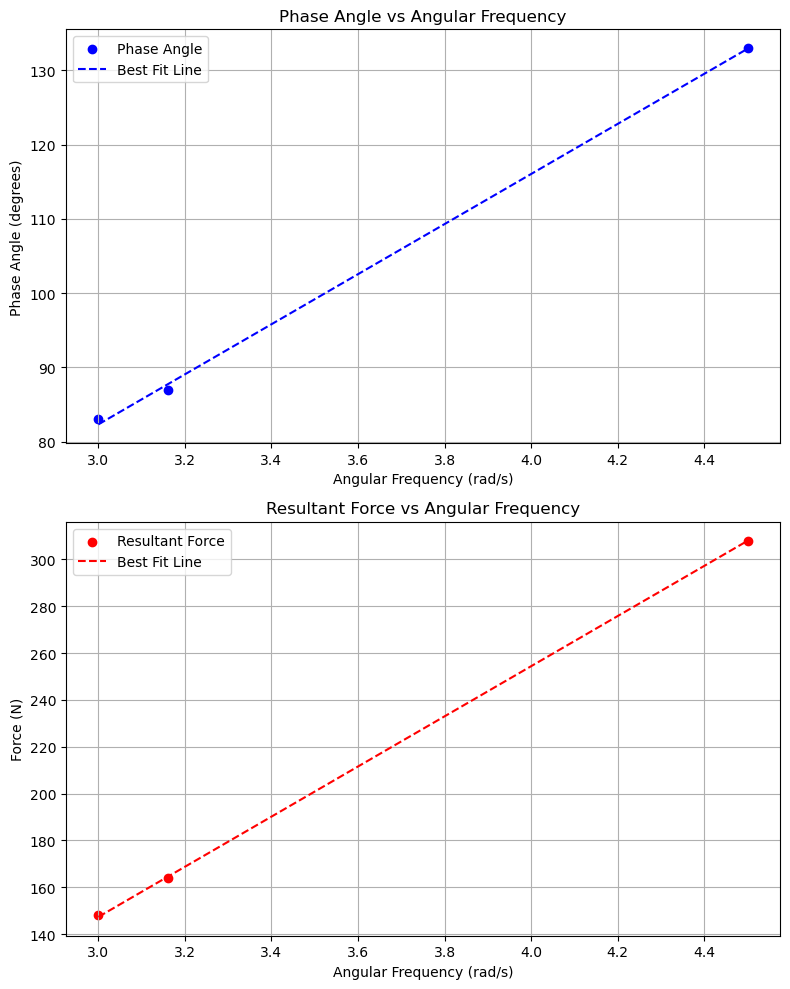

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace with your actual data)
angular_frequencies = np.array([3, 3.162, 4.5])  # Replace with your angular frequency data
phase_angles = np.array([83, 87, 133])    # Replace with your phase angle data
forces = np.array([148, 164, 308])            # Replace with your force data

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Plot 1: Phase angle vs Angular frequency (with line of best fit)
ax[0].scatter(angular_frequencies, phase_angles, color='b', label='Phase Angle')
# Line of best fit
p_phase = np.polyfit(angular_frequencies, phase_angles, 1)  # Linear fit (degree 1)
ax[0].plot(angular_frequencies, np.polyval(p_phase, angular_frequencies), color='b', linestyle='--', label='Best Fit Line')
ax[0].set_title('Phase Angle vs Angular Frequency')
ax[0].set_xlabel('Angular Frequency (rad/s)')
ax[0].set_ylabel('Phase Angle (degrees)')
ax[0].grid(True)
ax[0].legend()

# Plot 2: Resultant Force vs Angular frequency (with line of best fit)
ax[1].scatter(angular_frequencies, forces, color='r', label='Resultant Force')
# Line of best fit
p_force = np.polyfit(angular_frequencies, forces, 1)  # Linear fit (degree 1)
ax[1].plot(angular_frequencies, np.polyval(p_force, angular_frequencies), color='r', linestyle='--', label='Best Fit Line')
ax[1].set_title('Resultant Force vs Angular Frequency')
ax[1].set_xlabel('Angular Frequency (rad/s)')
ax[1].set_ylabel('Force (N)')
ax[1].grid(True)
ax[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


##### Part A, Q5

The system is governed by the second-order equation:

$$
m \ddot{x}  + k \dot{x} + cx = F(t)
$$

where:
- $m = Mass$
- $k = Damping Constant$
- $c = spring Constant$
- $x = Displacement$
- $\dot{x} = Velocity$
- $\ddot{x} = Acceleration$
- $F(t) = F_0 \cos(\omega t)$

We rewrite the equation as (State Space Representation):

- $\dot{x_1} = x_2$
- $\dot{x_2} = \frac{F}{m} - \frac{k}{m}x_2 - \frac{c}{m}x_1$

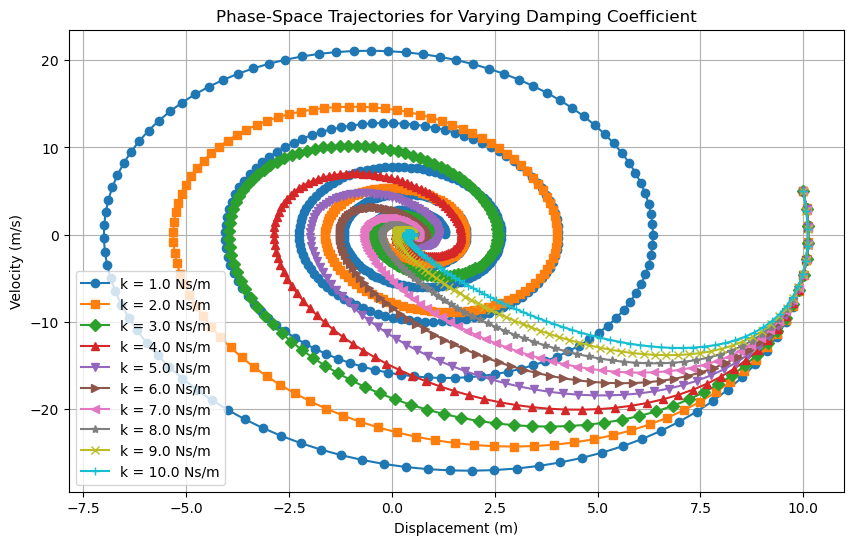

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

mass = 2
spring_constant = 20
external_force = 10
initial_conditions = [10, 5]  # initial displacement (x1) and velocity (x2)

def mass_spring_damper(t, x, damping_constant):
    '''
    SSR for mass-spring-damper system
    t = time
    x = [x1, x2] = [displacement, velocity], state vectors
    k = damping constant
    '''
    x1, x2 = x
    dx1_dt = x2
    dx2_dt = external_force / mass - (damping_constant / mass) * x2 - (spring_constant / mass) * x1
    return [dx1_dt, dx2_dt]

k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
markers = ['o', 's', 'D', '^', 'v', '>', '<', '*', 'x', '+']  # List of markers
time_span = (0, 10)
time_points = np.linspace(0, 10, 500)

plt.figure(figsize=(10, 6))
for k, marker in zip(k_values, markers):
    solution = solve_ivp(mass_spring_damper, time_span, initial_conditions, args=(k,), t_eval=time_points)

    x1 = solution.y[0]  # displacement
    x2 = solution.y[1]  # velocity
    
    # Plot with a specific marker
    plt.plot(x1, x2, label=f'k = {k:.1f} Ns/m', marker=marker)  # `markevery` controls marker frequency

plt.title("Phase-Space Trajectories for Varying Damping Coefficient")
plt.xlabel("Displacement (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()


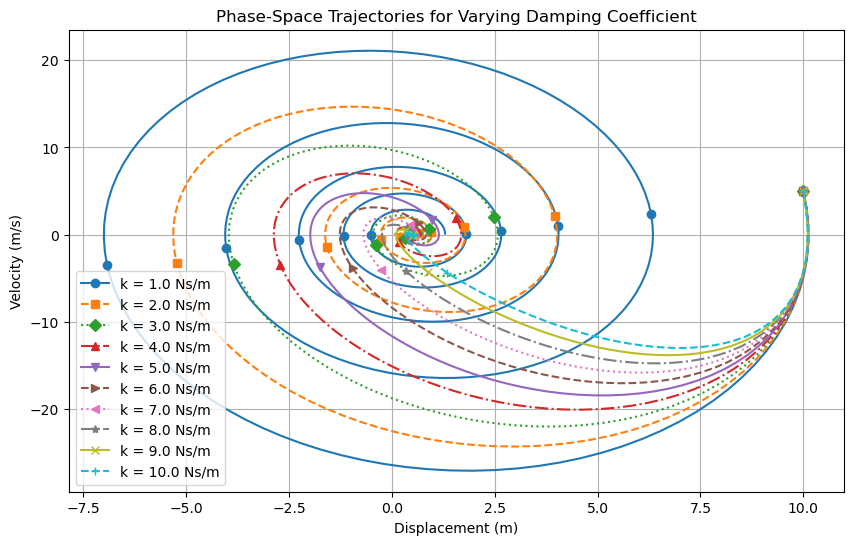

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

mass = 2
spring_constant = 20
external_force = 10
initial_conditions = [10, 5]  # initial displacement (x1) and velocity (x2)

def mass_spring_damper(t, x, damping_constant):
    '''
    SSR for mass-spring-damper system
    t = time
    x = [x1, x2] = [displacement, velocity], state vectors
    k = damping constant
    '''
    x1, x2 = x
    dx1_dt = x2
    dx2_dt = external_force / mass - (damping_constant / mass) * x2 - (spring_constant / mass) * x1
    return [dx1_dt, dx2_dt]

k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
markers = ['o', 's', 'D', '^', 'v', '>', '<', '*', 'x', '+']  # List of markers
linestyles = ['-', '--', ':', '-.', '-', '--', ':', '-.', '-', '--']  # List of different line styles
time_span = (0, 10)
time_points = np.linspace(0, 10, 500)

plt.figure(figsize=(10, 6))
for k, marker, linestyle in zip(k_values, markers, linestyles):
    solution = solve_ivp(mass_spring_damper, time_span, initial_conditions, args=(k,), t_eval=time_points)

    x1 = solution.y[0]  # displacement
    x2 = solution.y[1]  # velocity
    
    # Plot with a specific marker and linestyle
    plt.plot(x1, x2, label=f'k = {k:.1f} Ns/m', linestyle=linestyle, marker=marker, markevery=50)

plt.title("Phase-Space Trajectories for Varying Damping Coefficient")
plt.xlabel("Displacement (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.grid()
plt.show()


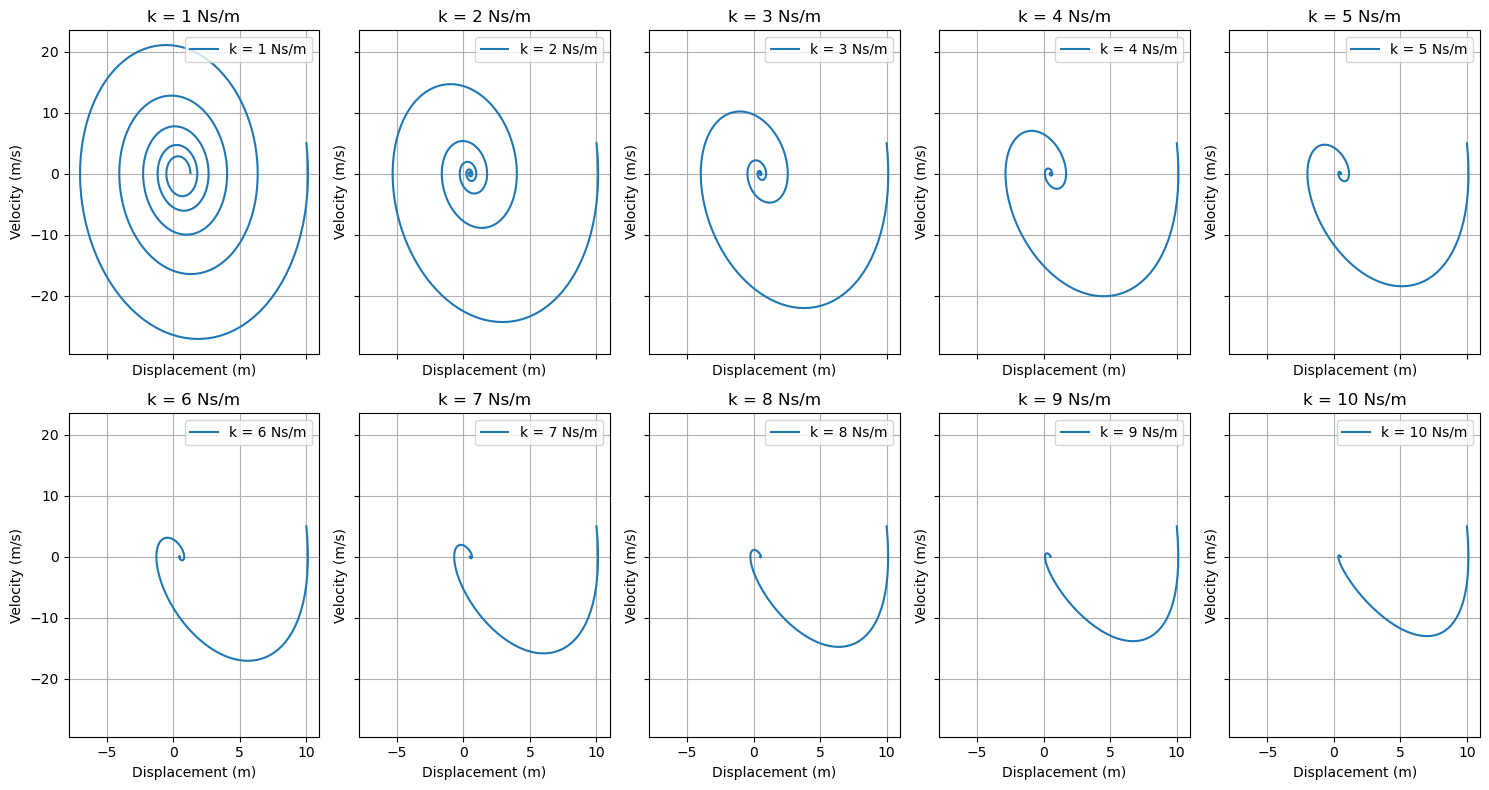

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

mass = 2
spring_constant = 20
external_force = 10
initial_conditions = [10, 5]  # initial displacement (x1) and velocity (x2)

def mass_spring_damper(t, x, damping_constant):
    '''
    SSR for mass-spring-damper system
    t = time
    x = [x1, x2] = [displacement, velocity], state vectors
    k = damping constant
    '''
    x1, x2 = x
    dx1_dt = x2
    dx2_dt = external_force / mass - (damping_constant / mass) * x2 - (spring_constant / mass) * x1
    return [dx1_dt, dx2_dt]

k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
time_span = (0, 10)
time_points = np.linspace(0, 10, 500)

# Set up subplots
num_plots = len(k_values)
cols = 5  # Number of columns in the grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharex=True, sharey=True)

for i, k in enumerate(k_values):
    row, col = divmod(i, cols)  # Determine subplot position
    ax = axes[row, col] if rows > 1 else axes[col]  # Handle 1-row edge case
    
    # Solve the ODE
    solution = solve_ivp(mass_spring_damper, time_span, initial_conditions, args=(k,), t_eval=time_points)
    x1 = solution.y[0]  # Displacement
    x2 = solution.y[1]  # Velocity
    
    # Plot phase-space trajectory
    ax.plot(x1, x2, label=f'k = {k} Ns/m', linestyle='-')
    ax.set_title(f'k = {k} Ns/m')
    ax.set_xlabel("Displacement (m)")
    ax.set_ylabel("Velocity (m/s)")
    ax.legend()
    ax.grid()

# Remove any empty subplots
for i in range(num_plots, rows * cols):
    row, col = divmod(i, cols)
    fig.delaxes(axes[row, col] if rows > 1 else axes[col])

plt.tight_layout()
plt.show()


##### Part A, Q6 -7

The system is given by:

$$
m \ddot{x}  + k \dot{x} + cx = F(t)
$$

where:
- $m = Mass$
- $k = Damping Constant$
- $c = spring Constant$
- $x = Displacement$
- $\dot{x} = Velocity$
- $\ddot{x} = Acceleration$
- $F(t) = F_0 \cos(\omega t)$


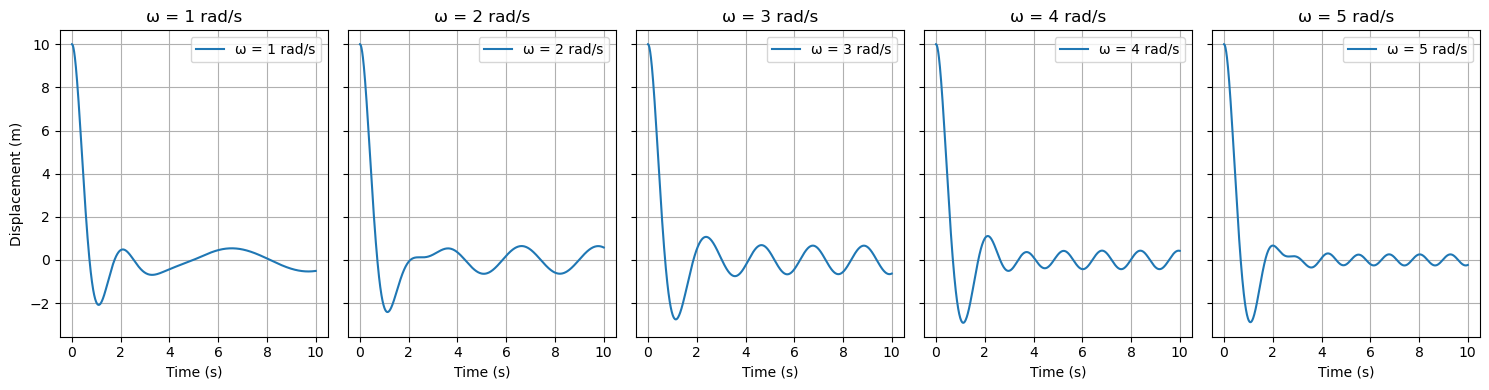

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 2  
k = 5 
c = 20
F0 = 10 

def system_dynamics(t, y, omega):
    x, v = y  
    dxdt = v
    dvdt = (F0 * np.cos(omega * t) - k * v - c * x) / m
    return [dxdt, dvdt]

t_span = [0, 10] 
t_eval = np.linspace(0, 10, 1000)  

y0 = [10, 0]

frequencies = [1, 2, 3, 4, 5]

# Set up subplots
num_plots = len(frequencies)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 4), sharey=True)

for i, omega in enumerate(frequencies):
    ax = axes[i]  # Select subplot
    sol = solve_ivp(system_dynamics, t_span, y0, args=(omega,), t_eval=t_eval)
    
    # Plot displacement for the given frequency
    ax.plot(sol.t, sol.y[0], label=f'ω = {omega} rad/s', linestyle='-')
    ax.set_title(f'ω = {omega} rad/s')
    ax.set_xlabel('Time (s)')
    if i == 0:
        ax.set_ylabel('Displacement (m)')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


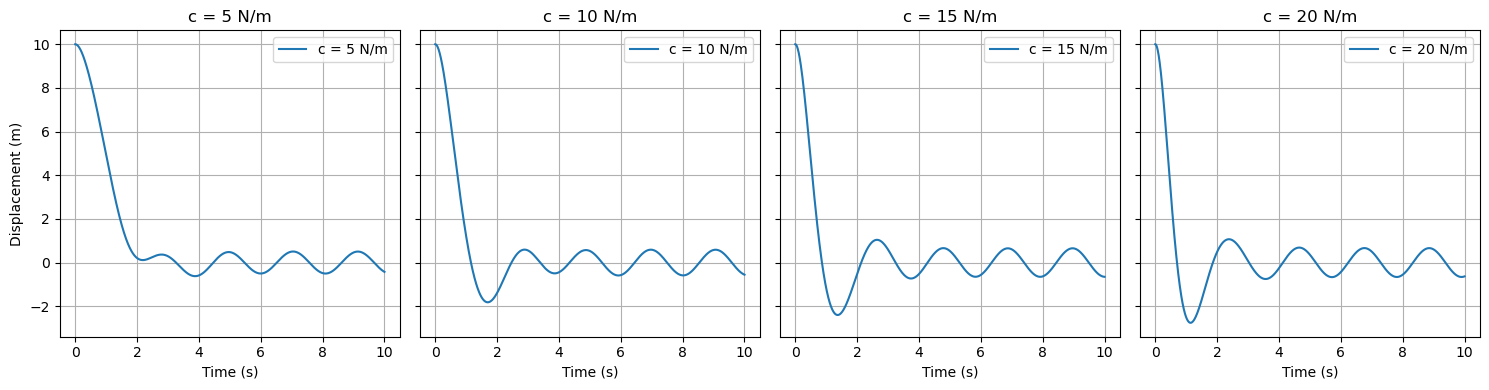

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

mass = 2
damping_constant = 5
external_force = 10
omega = 3  
initial_displacement = 10 

t = np.linspace(0, 10, 1000)

def system_eq(X, t, mass, damping_constant, c, external_force, omega):
    x, v = X
    dxdt = v
    dvdt = (external_force * np.cos(omega * t) - damping_constant * v - c * x) / mass
    return [dxdt, dvdt]

c_values = [5, 10, 15, 20]

# Set up subplots
num_plots = len(c_values)
fig, axes = plt.subplots(1, num_plots, figsize=(15, 4), sharey=True)

for i, c in enumerate(c_values):
    ax = axes[i]  # Select the subplot
    X0 = [initial_displacement, 0]
    
    # Solve the system for the given spring constant
    sol = odeint(system_eq, X0, t, args=(mass, damping_constant, c, external_force, omega))
    
    # Plot displacement for the given spring constant
    ax.plot(t, sol[:, 0], label=f'c = {c} N/m', linestyle='-')
    ax.set_title(f'c = {c} N/m')
    ax.set_xlabel('Time (s)')
    if i == 0:
        ax.set_ylabel('Displacement (m)')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


##### Part A, Q8

In [11]:
from scipy.fft import fft, fftfreq
from scipy.integrate import solve_ivp

mass = 2 
spring_constant = 20  
damping_coeff = 5
external_force = 10
T = 2 
omega = 2 * np.pi / T
t = np.linspace(0, 10, 1000)

square_wave = external_force * np.sign(np.sin(omega * t))

sin_wave = external_force * np.cos(omega * t)

def system(t, y, F):
    x, v = y
    a = (F(t) -damping_coeff*v -spring_constant*x)/mass
    return [v, a]

force_sin = lambda t: external_force * np.cos(omega * t)
force_square = lambda t: external_force * np.sign(np.sin(omega * t))

sol_sin = solve_ivp(system, [0, 10], [0.1, 0], args=(force_sin,), t_eval=t)
sol_square = solve_ivp(system, [0, 10], [0.1, 0], args=(force_square,), t_eval=t)

acc_sin = (sin_wave - damping_coeff * sol_sin.y[1] - spring_constant * sol_sin.y[0]) / m
acc_square = (square_wave - damping_coeff * sol_square.y[1] - spring_constant * sol_square.y[0]) / m


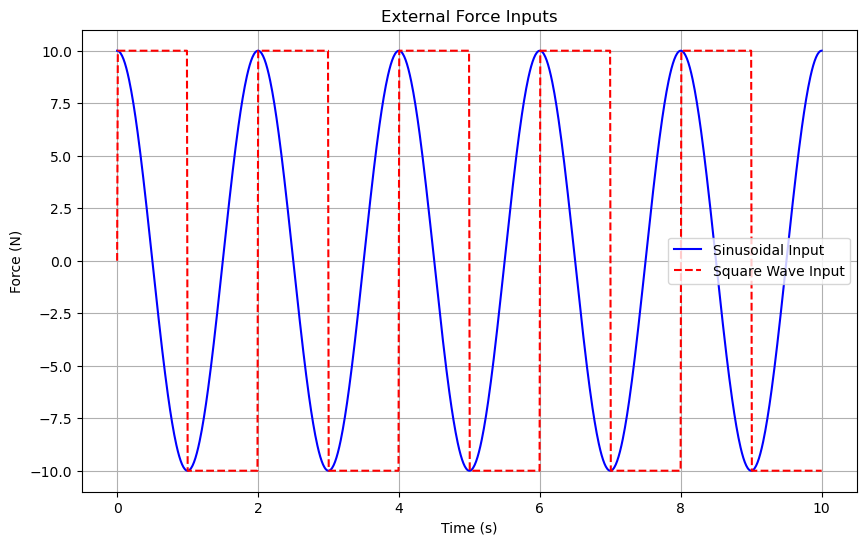

In [12]:

# plot the sin_wave and square_wave

plt.figure(figsize=(10, 6))
plt.plot(t, sin_wave, label="Sinusoidal Input", color='b')
plt.plot(t, square_wave, label="Square Wave Input", color='r', linestyle='--')
plt.title("External Force Inputs")
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.legend()
plt.grid()
plt.show()


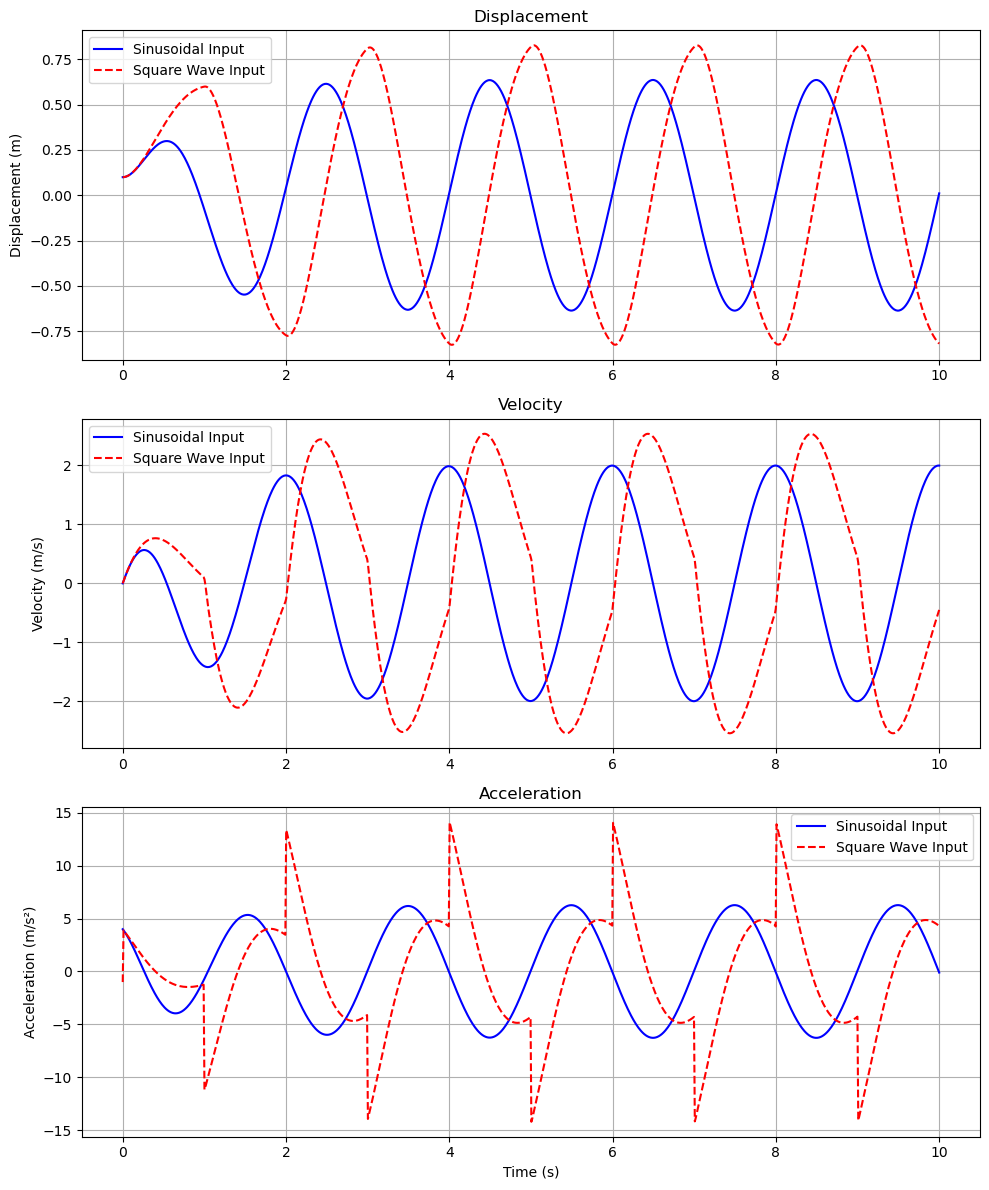

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

axs[0].plot(t, sol_sin.y[0], label="Sinusoidal Input", color='b')
axs[0].plot(t, sol_square.y[0], label="Square Wave Input", color='r', linestyle='--')
axs[0].set_title("Displacement")
axs[0].set_ylabel("Displacement (m)")
axs[0].legend()
axs[0].grid()

axs[1].plot(t, sol_sin.y[1], label="Sinusoidal Input", color='b')
axs[1].plot(t, sol_square.y[1], label="Square Wave Input", color='r', linestyle='--')
axs[1].set_title("Velocity")
axs[1].set_ylabel("Velocity (m/s)")
axs[1].legend()
axs[1].grid()

axs[2].plot(t, acc_sin, label="Sinusoidal Input", color='b')
axs[2].plot(t, acc_square, label="Square Wave Input", color='r', linestyle='--')
axs[2].set_title("Acceleration")
axs[2].set_ylabel("Acceleration (m/s²)")
axs[2].set_xlabel("Time (s)")
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

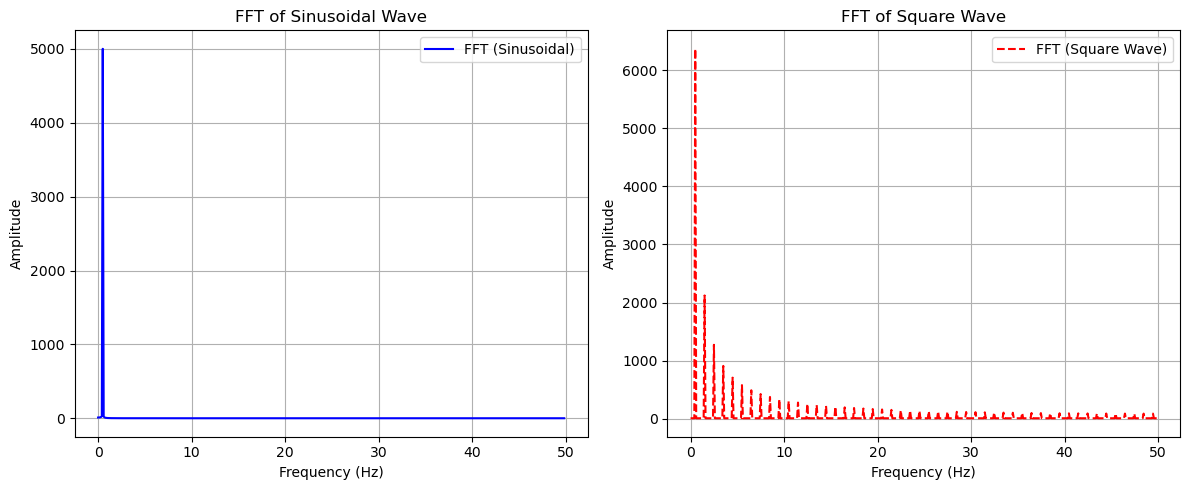

In [22]:
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# System parameters
mass = 2 
spring_constant = 20  
damping_coeff = 5
external_force = 10
T = 2 
omega = 2 * np.pi / T
t = np.linspace(0, 10, 1000)

# Generate wave inputs
square_wave = external_force * np.sign(np.sin(omega * t))
sin_wave = external_force * np.cos(omega * t)

# System dynamics function
def system(t, y, F):
    x, v = y
    a = (F(t) - damping_coeff * v - spring_constant * x) / mass
    return [v, a]

# Define forces
force_sin = lambda t: external_force * np.cos(omega * t)
force_square = lambda t: external_force * np.sign(np.sin(omega * t))

# Solve the system
sol_sin = solve_ivp(system, [0, 10], [0.1, 0], args=(force_sin,), t_eval=t)
sol_square = solve_ivp(system, [0, 10], [0.1, 0], args=(force_square,), t_eval=t)

# Compute accelerations
acc_sin = (sin_wave - damping_coeff * sol_sin.y[1] - spring_constant * sol_sin.y[0]) / mass
acc_square = (square_wave - damping_coeff * sol_square.y[1] - spring_constant * sol_square.y[0]) / mass

# Perform FFT
fft_sin = fft(sin_wave)
fft_square = fft(square_wave)
freqs = fftfreq(len(t), d=t[1] - t[0])

# Plot individual FFT results in subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# FFT for sinusoidal wave
axes[0].plot(freqs[:len(freqs)//2], np.abs(fft_sin[:len(freqs)//2]), label="FFT (Sinusoidal)", color='b')
axes[0].set_title("FFT of Sinusoidal Wave")
axes[0].set_xlabel("Frequency (Hz)")
axes[0].set_ylabel("Amplitude")
axes[0].grid()
axes[0].legend()

# FFT for square wave
axes[1].plot(freqs[:len(freqs)//2], np.abs(fft_square[:len(freqs)//2]), label="FFT (Square Wave)", linestyle="--", color='r')
axes[1].set_title("FFT of Square Wave")
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Amplitude")
axes[1].grid()
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


### Part B: Base Motion in the Rocket

##### Part B, Q2

The Rocket re-entry is modelled as:

$$
Y(t) = Y_0 cos(\omega t)
$$

Angualar Frequency is given by: 
$$
V\frac{2 \pi}{l}

$$
where:
- $V$ (speed of the rocket relative to air) = 2000m/s 
- $l$ (characteristic length scale of the disturbance caused by the turbulence) = 1000m



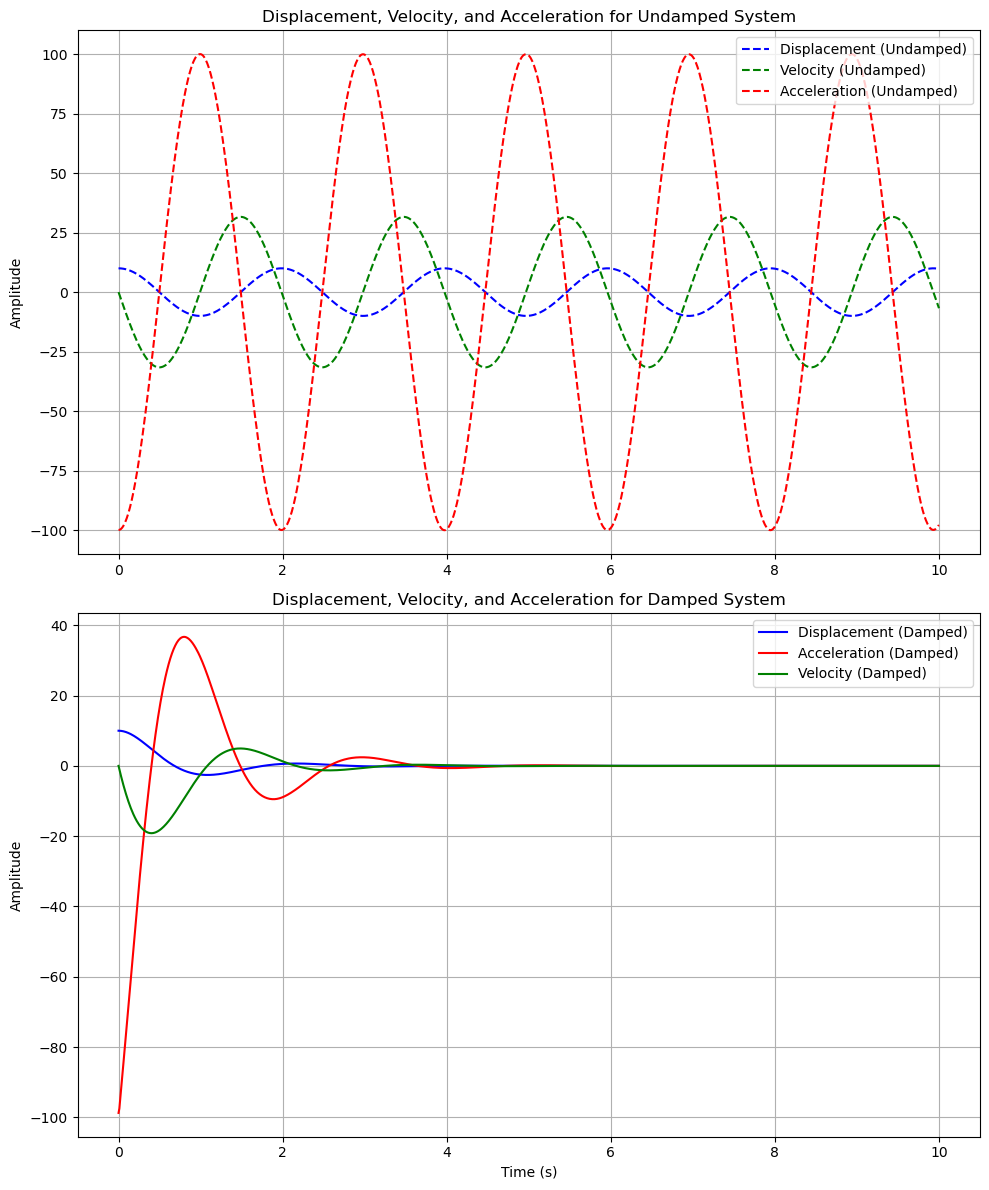

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 2  
c = 20  
k_damped = 5  
k_undamped = 0  

# Time range
t_span = (0, 10)  # seconds
t_eval = np.linspace(0, 10, 1000)  # Evaluation times

def system(t, state, damping_coeff):
    x1, x2 = state  # x1 = x, x2 = dx/dt
    dx1dt = x2
    dx2dt = -(c / m) * x1 - (damping_coeff / m) * x2
    return [dx1dt, dx2dt]

def solve_system(damping_coeff):
    initial_state = [10, 0]  # x(0) = 10 m, dx/dt(0) = 0 m/s
    solution = solve_ivp(system, t_span, initial_state, t_eval=t_eval, args=(damping_coeff,))
    x = solution.y[0]
    v = solution.y[1]
    a = np.gradient(v, t_eval)  # Approximate acceleration
    return x, v, a, solution.t

x_damped, v_damped, a_damped, time = solve_system(k_damped)

x_undamped, v_undamped, a_undamped, _ = solve_system(k_undamped)

fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].plot(time, x_undamped, label='Displacement (Undamped)', linestyle='--', color='blue')
axs[0].plot(time, v_undamped, label='Velocity (Undamped)', linestyle='--', color='green')
axs[0].plot(time, a_undamped, label='Acceleration (Undamped)', linestyle='--', color='red')
axs[0].set_title("Displacement, Velocity, and Acceleration for Undamped System")
axs[0].set_ylabel("Amplitude")
axs[0].legend()
axs[0].grid()

axs[1].plot(time, x_damped, label='Displacement (Damped)', linestyle='-', color='blue')
axs[1].plot(time, a_damped, label='Acceleration (Damped)', linestyle='-', color='red')
axs[1].plot(time, v_damped, label='Velocity (Damped)', linestyle='-', color='green')
axs[1].set_title("Displacement, Velocity, and Acceleration for Damped System")
axs[1].set_ylabel("Amplitude")
axs[1].set_xlabel("Time (s)")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()


##### Part B, Q4


Given 
- Base Excitation Force as: 
$$
y = Y_0 \cos(\omega t) \\ 

\dot{y} = -\omega Y_0 sin(\omega t) 
$$
- Angualar Frequency as: 
$$
V\frac{2 \pi}{l}
$$
Given:
- $V = 2000m/s$
- $l = 1000m$

i.e. 
$$
\omega = 12.566 rad/s
$$


The system model is given by:

$$
m \ddot{x}  + k \dot{x} + cx = y(t)
$$

where:
- $m = Mass$
- $k = Damping Constant$
- $c = spring Constant$
- $x = Displacement$
- $\dot{x} = Velocity$
- $\ddot{x} = Acceleration$
- $y(t) = Y \cos(\omega t)$  

From Newtons Second Law,  $\sum F = ma$,  we have:

$$
m \ddot{x}  + k (\dot{x} - \dot{y}) + c(x-y) = 0  \\

m \ddot{x}  + k \dot{x} - k \dot{y} + cx-cy = 0 \\

m \ddot{x}  + k \dot{x} + cx = cy + k \dot{y} \\

$$

Substituting for $y$ and $\dot{y}$, we have:

$$
m \ddot{x}  + k \dot{x} + cx = cy \cos(\omega t) - k \omega y \sin(\omega t) \\
$$

We know that:

$$
x = X_0 \cos(\omega t - \phi) \quad \text{... eq(1)}
$$
$$
\dot{x} = -\omega X_0 \sin(\omega t - \phi) \quad \text{... eq(2)}
$$
$$
\ddot{x} = -\omega^2 X_0 \cos(\omega t - \phi) \quad \text{... eq(3)}
$$

Substituting eq(1), eq(2) and eq(3) into the system model, we have:

$$
m (-\omega^2 X_0 \cos(\omega t - \phi))  + k (-\omega X_0 \sin(\omega t - \phi)) + c(X_0 \cos(\omega t - \phi)) = cY \cos(\omega t) - k \omega Y \sin(\omega t) \\
$$

After Phasor representation, we have:

$$
F_{res1}^2 = cy^2 + Kyw^2 \\
\quad = y^2(c^2 + kw^2) \\
$$

$$
F_{res2}^2 = (kX_0 \omega)^2 + (cX_0 - mX_0\omega)^2 \\
\quad = X_0^2((k\omega)^2 + (c - m\omega^2)^2) \\
$$

Equating $F_{res1}^2$ and $F_{res2}^2$, we have:

$$
y^2(c^2 + kw^2) = X_0^2((k\omega)^2 + (c - m\omega^2)^2) \\
$$

Equations for $X_0$ and $\phi$, we have:

$$
X_0 = Y_0 \sqrt(\frac{c^2 + (kw)^2}{(k\omega)^2 + (c - m\omega^2)^2}) \\
$$

$$
\phi = \tan^{-1}\frac{m\omega^3k}{c^2 - m\omega^2c + k^2\omega^2} \\
$$

Solving for $X_0$ and $\phi$:

Given:
- $m = 2kg$
- $k = 5N/m$
- $c = 20Ns/m$
- $Y_0 = 150m$
- $\omega = 12.566 rad/s$

We have:

$$
X_0 = 151 \sqrt(\frac{20^2 + (5*12.566)^2}{(5(12.566))^2 + (20 - 2(12.566)^2)^2}) \\
$$

$$
\phi = \tan^{-1}\frac{2(12.566)^3(5)}{20^2 - 2(12.566)^2(20) + 5^2(12.566)^2} \\
$$

$$
X_0 = 32.92m \\
\phi = -84.334rads/s\quad(95.67^\circ) \\
$$

##### Part B, Q5 



$$
\dot{X} = \underset{\rightarrow}{A}\vec{x} + \underset{\rightarrow}{B}\vec{y} \\
$$

Introduce the state variables:
$$
x_1 = x, \quad x_2 = \dot{x}
$$

This gives:
$$
\dot{x}_1 = x_2, \quad \dot{x}_2 = \ddot{x}
$$

From the differential equation:
$$
m\ddot{x} = -k\dot{x} - cx + k\dot{y} + cy
$$

Re-arranging for $\ddot{x}$:
$$
\dot{x}_2 = -\frac{c}{m}x_1 - \frac{k}{m}x_2 + \frac{k}{m}\dot{y} + \frac{c}{m}y
$$

Now, the state-space form becomes:
$$
\begin{bmatrix}
\dot{x}_1 \\
\dot{x}_2
\end{bmatrix}
=
\underbrace{\begin{bmatrix}
0 & 1 \\
-\frac{c}{m} & -\frac{k}{m}
\end{bmatrix}}_{A}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\underbrace{\begin{bmatrix}
0 & 0 \\
\frac{c}{m} & \frac{k}{m}
\end{bmatrix}}_{B}
\begin{bmatrix}
y \\
\dot{y}
\end{bmatrix}
$$

Here:
- $A$ is the system matrix.
- $B$ accounts for the influence of $y(t)$ and $\dot{y}(t)$, the base motion and its velocity.


##### Part B, Q6

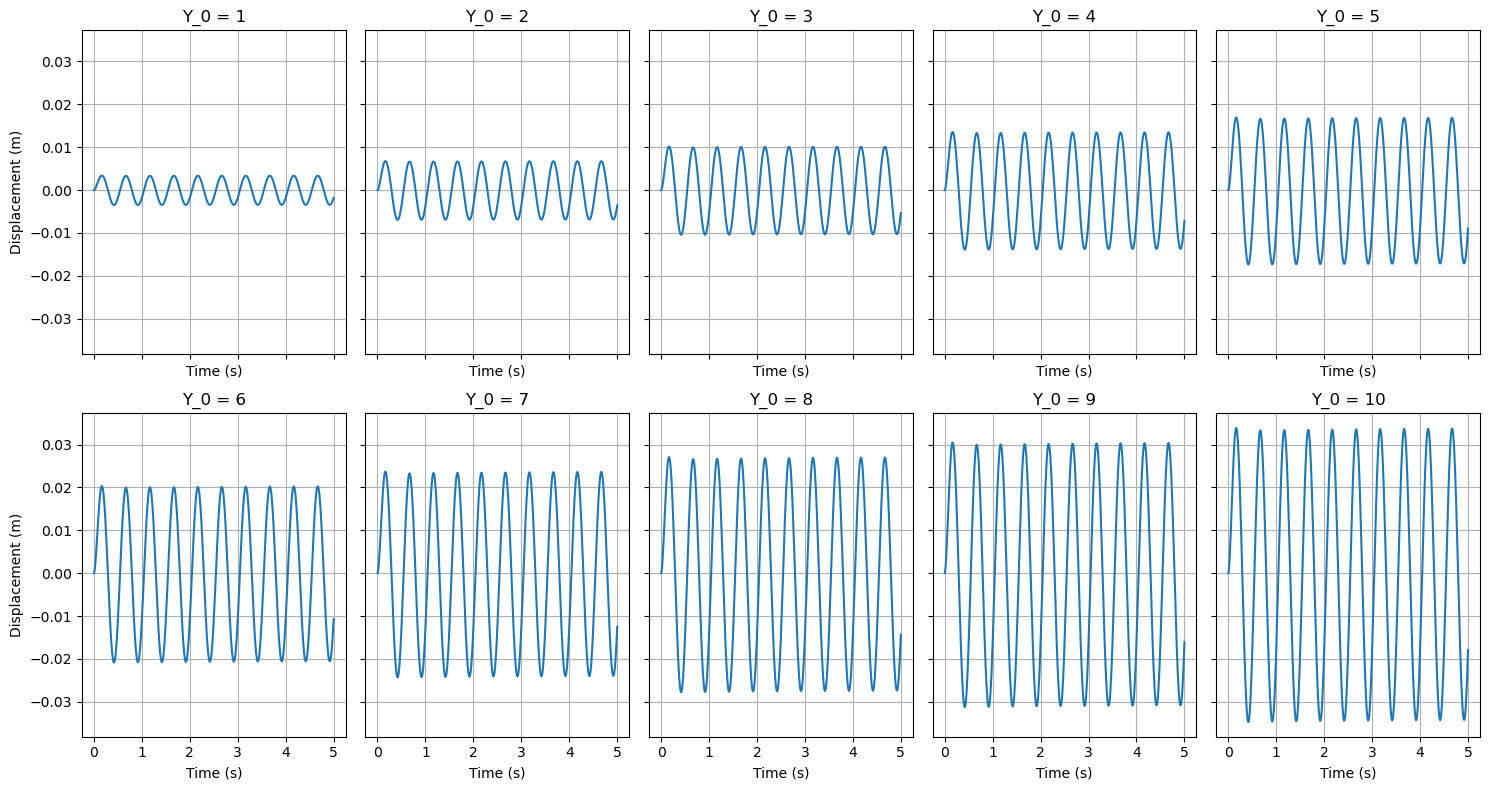

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

# System parameters
V = 2000  # speed in m/s
l = 1000  # characteristic length in m
omega = (V * 2 * np.pi) / l  # angular frequency
m = 1  # mass (you can replace this with your value)
k = 5  # spring constant (replace this too)
c = 20  # damping coefficient (example value)

# Define the mass-spring-damper system
def mass_spring_damper(t, X, Y0, omega, m, c, k):
    x, v = X
    dxdt = v
    dvdt = (-c * v - k * x) / m + Y0 * np.cos(omega * t) / m
    return [dxdt, dvdt]

# Time range
t_span = (0, 5)
time = np.linspace(t_span[0], t_span[1], 500)

# Solve for multiple values of Y0
Y0_values = np.arange(1, 11)
displacement_results = []
phase_results = []

for Y0 in Y0_values:
    X0 = [0, 0]  # initial conditions
    sol = solve_ivp(mass_spring_damper, t_span, X0, args=(Y0, omega, m, c, k), t_eval=time)
    displacement = sol.y[0]  # displacement
    
    # Find phase angle: compare the first peak of the system's response to the excitation Y(t)
    peaks, _ = find_peaks(displacement)  # find peaks in displacement
    if len(peaks) > 0:  # if there's at least one peak
        first_peak_time = time[peaks[0]]  # time of the first peak
        excitation_peak_time = np.pi / omega  # first peak of cos(omega * t) is at pi/omega
        phase_shift = first_peak_time - excitation_peak_time  # time difference
        phase_angle = phase_shift * omega * (180 / np.pi)  # convert to degrees
        phase_results.append(phase_angle)
    else:
        phase_results.append(0)  # no peak means zero phase angle
    
    displacement_results.append(displacement)

# Create subplots
num_plots = len(Y0_values)
cols = 5  # Number of columns in the grid
rows = (num_plots + cols - 1) // cols  # Calculate number of rows
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True, sharex=True)

# Plot Displacement Responses in Subplots
for i, (Y0, displacement) in enumerate(zip(Y0_values, displacement_results)):
    row, col = divmod(i, cols)  # Determine subplot position
    ax = axes[row, col] if rows > 1 else axes[col]  # Handle single-row case
    ax.plot(time, displacement, linestyle='-')
    ax.set_title(f'Y_0 = {Y0}')
    ax.set_xlabel('Time (s)')
    if col == 0:
        ax.set_ylabel('Displacement (m)')
    ax.grid(True)

# Remove empty subplots
for i in range(len(Y0_values), rows * cols):
    row, col = divmod(i, cols)
    fig.delaxes(axes[row, col] if rows > 1 else axes[col])

# Final adjustments
plt.tight_layout()
plt.show()


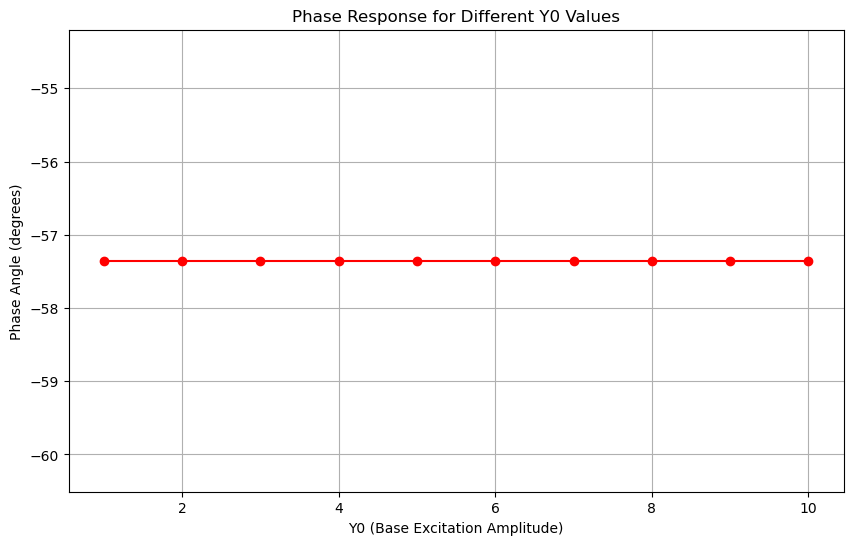

In [17]:
# Plot Phase Response (no change to line style here, as it's just a single plot)
plt.figure(figsize=(10, 6))
plt.plot(Y0_values, phase_results, 'o-', color='r')
plt.title('Phase Response for Different Y0 Values')
plt.xlabel('Y0 (Base Excitation Amplitude)')
plt.ylabel('Phase Angle (degrees)')
plt.grid(True)
plt.show()